In [1]:
import os
import trompy as tp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%run "..//src//vgp_helper_fx_spectral"



In [2]:
ROOT_FOLDER = "D:\\VGP"

DATA_FOLDER = os.path.join(ROOT_FOLDER, "2P\\proc_s2p\\")
BEHAV_FOLDER = os.path.join(ROOT_FOLDER, "Bonsai\\")
METAFILE = os.path.join(ROOT_FOLDER, "Metafile_VGP2.4.xls")
rows, header = tp.metafilereader(METAFILE, sheetname="Analysis_Cas+malt")


File is excel file. Making csv metafile first


In [3]:
# Goes through metafile assembling data from s2p files where possible

cell_data={}

for row in rows:
    try:
        key=row[0]+'_'+row[3]
        animal=row[0]
        day=row[2]
        date=int(row[1])
        events=row[6]
#         solution=row[3]
        
        s2p_folder = os.path.join(DATA_FOLDER,
                                  "sub-{}\\ses-{}-{}\\suite2p\\plane0"
                                  .format(animal, day, date))
        events_file =BEHAV_FOLDER+events
        
        
        cell_data[key] = assemble_data(s2p_folder,events_file)
        cell_data[key]['animal'] = row[0]
        cell_data[key]['diet'] = row[11]
        cell_data[key]['session'] = row[3]
        cell_data[key]['solution']=row[5]
        
    except FileNotFoundError:
        print('Cannot find file for', key)
     

Cannot find file for VGP306_M5
Cannot find file for VGP307_C3
Cannot find file for VGP402_C1


C:\Users\mko102\GitHub\VGP\src\vgp_helper_fx_spectral.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(snips)


In [4]:
# cell_data['VGP203_C3']['empty_lick_snips_all']

In [5]:
mice=[]

for key in cell_data.keys(): 
    d=cell_data[key]
    mouseid=d['animal']
    if mouseid not in mice: mice.append(mouseid)

In [6]:
test= np.mean(cell_data['VGP118_C1']['lick_snips_all'][np.where(cell_data['VGP118_C1']['lick_responsive']==1)],axis=1)

In [7]:
PR_C1_licks_act=[]
PR_C1_licks_inh=[]

PR_C2_licks_act=[]
PR_C2_licks_nonres=[]

PR_C3_licks_act=[]
PR_C3_licks_inhib=[]
PR_C3_licks_nonres=[]

animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='C1':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_C1_licks_act.append(np.mean(lick_snips, axis=0))
        
    elif d['diet']=='PR' and d['session']=='C2':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_C2_licks_act.append(np.mean(lick_snips, axis=0))
#         snips_non=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==0)],axis=1)) 
#         PR_C2_licks_nonres.append(np.mean(snips_non, axis=0))
    
    elif d['diet']=='PR' and d['session']=='C3':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1))
        snips_in=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==-1)],axis=1))
        PR_C3_licks_act.append(np.mean(lick_snips, axis=0))
        PR_C3_licks_inhib.append(np.mean(snips_in, axis=0))
#         snips_non=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==0)],axis=1)) 
#         PR_C3_licks_nonres.append(np.mean(snips_non, axis=0))

#Filtering out empty arrays        
PR_C2_licks_act_f=[]        
for animal in PR_C2_licks_act: 
    if not np.isnan(animal).any(): 
        PR_C2_licks_act_f.append(animal)
        
PR_C1_licks_inh_f=[]        
for animal in PR_C1_licks_inh: 
    if not np.isnan(animal).any(): 
        PR_C1_licks_inh_f.append(animal)

        
        

PR_Cas=[]
snips_cas=[]
for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['solution']=='Cas':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_Cas.append(np.mean(lick_snips, axis=0))

        
        
        
PR_Cas_f=[]        
for animal in PR_Cas: 
    if not np.isnan(animal).any(): 
        PR_Cas_f.append(animal)
        
        

In [8]:
PR_M1_licks_act=[]
PR_M2_licks_act=[]
PR_M3_licks_act=[]
PR_M3_licks_inhib=[]


animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='M1':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_M1_licks_act.append(np.mean(lick_snips, axis=0))
        
    elif d['diet']=='PR' and d['session']=='M2':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_M2_licks_act.append(np.mean(lick_snips, axis=0))       
    
    elif d['diet']=='PR' and d['session']=='M3':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        lick_snips_in=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==-1)],axis=1))
        PR_M3_licks_act.append(np.mean(lick_snips, axis=0))
        PR_M3_licks_inhib.append(np.mean(lick_snips_in, axis=0))
        
print(animal)
PR_M2_licks_act_f=[]        
for animal in PR_M2_licks_act: 
    if not np.isnan(animal).any(): 
        PR_M2_licks_act_f.append(animal)
        
PR_M3_licks_inhib_f=[]
for animal in PR_M3_licks_inhib: 
    if not np.isnan(animal).any(): 
        PR_M3_licks_inhib_f.append(animal)
        
        
        
PR_malt=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['solution']=='Malt':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_malt.append(np.mean(lick_snips, axis=0))
        
        
        
PR_malt_f=[]        
for animal in PR_malt: 
    if not np.isnan(animal).any(): 
        PR_malt_f.append(animal)
        
        


['VGP118', 'VGP203', 'VGP302', 'VGP306', 'VGP307', 'VGP402', 'VGP505', 'VGP506', 'VGP509']


C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [9]:
NR_C1_licks_act=[]
NR_C2_licks_act=[]
NR_C3_licks_act=[]

animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['session']=='C1':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_C1_licks_act.append(np.mean(lick_snips, axis=0))

        
    elif d['diet']=='NR' and d['session']=='C2':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_C2_licks_act.append(np.mean(lick_snips, axis=0))

    
    elif d['diet']=='NR' and d['session']=='C3':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_C3_licks_act.append(np.mean(lick_snips, axis=0))




NR_C3_licks_act_f=[]        
for animal in NR_C3_licks_act: 
    if not np.isnan(animal).any(): 
        NR_C3_licks_act_f.append(animal)
        
        
NR_cas=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['solution']=='Cas':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_cas.append(np.mean(lick_snips, axis=0))
        
        
        
NR_cas_f=[]        
for animal in NR_cas: 
    if not np.isnan(animal).any(): 
        NR_cas_f.append(animal)


In [10]:
NR_M1_licks_act=[]
NR_M2_licks_act=[]
NR_M3_licks_act=[]


animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['session']=='M1':
        lick_snips1=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_M1_licks_act.append(np.mean(lick_snips1, axis=0))
        
    elif d['diet']=='NR' and d['session']=='M2':
        animal.append(d['animal'])
        lick_snips2=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_M2_licks_act.append(np.mean(lick_snips2, axis=0))

    elif d['diet']=='NR' and d['session']=='M3':
        animal.append(d['animal'])
        lick_snips3=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_M3_licks_act.append(np.mean(lick_snips3, axis=0))

        
NR_malt=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['solution']=='Malt':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_malt.append(np.mean(lick_snips, axis=0))
        
        
        
NR_malt_f=[]        
for animal in NR_malt: 
    if not np.isnan(animal).any(): 
        NR_malt_f.append(animal)


Text(0.5, 1.0, 'Maltodextrin')

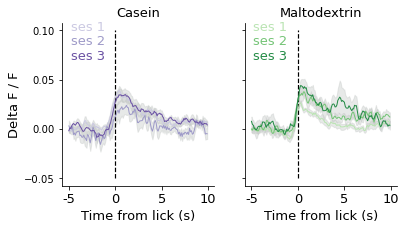

In [11]:
f, ax = plt.subplots(figsize=(6,3),ncols=2, sharey=True)

tp.shadedError(ax[0], PR_C1_licks_act, linecolor="#cbc9e2")
# tp.shadedError(ax[0], PR_C1_licks_inh_f, linecolor="black")


tp.shadedError(ax[0], PR_C2_licks_act_f, linecolor="#9e9ac8")

tp.shadedError(ax[0], PR_C3_licks_act, linecolor="#6a51a3")



tp.shadedError(ax[1], PR_M1_licks_act, linecolor="#bae4b3")

tp.shadedError(ax[1], PR_M2_licks_act_f, linecolor="#74c476")

tp.shadedError(ax[1], PR_M3_licks_act, linecolor="#238b45")




ax[0].text(2, 0.1, "ses 1",color='#cbc9e2', size=13)
ax[0].text(2, 0.085, "ses 2", color="#9e9ac8",size=13)
ax[0].text(2, 0.07, "ses 3", color="#6a51a3",size=13)

ax[1].text(2, 0.1, "ses 1",color='#bae4b3', size=13)
ax[1].text(2, 0.085, "ses 2", color="#74c476",size=13)
ax[1].text(2, 0.07, "ses 3", color="#238b45",size=13)


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0, size=13)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)", size=13)


ax[0].set_ylabel("Delta F / F", size=13)
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)

ax[0].set_title('Casein', size=13)
ax[1].set_title('Maltodextrin', size=13)



# f.savefig("..//output//PR_licksnips_casmalt.png")


Text(0.5, 1.0, 'Maltodextrin')

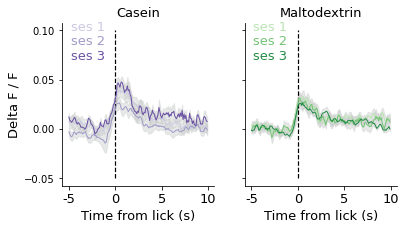

In [12]:
f, ax = plt.subplots(figsize=(6,3),ncols=2, sharey=True)

tp.shadedError(ax[0], NR_C1_licks_act, linecolor="#cbc9e2")

tp.shadedError(ax[0], NR_C2_licks_act, linecolor="#9e9ac8")

tp.shadedError(ax[0], NR_C3_licks_act_f, linecolor="#6a51a3")



tp.shadedError(ax[1], NR_M1_licks_act, linecolor="#bae4b3")

tp.shadedError(ax[1], NR_M2_licks_act, linecolor="#74c476")

tp.shadedError(ax[1], NR_M3_licks_act, linecolor="#238b45")






ax[0].text(2, 0.1, "ses 1",color='#cbc9e2', size=13)
ax[0].text(2, 0.085, "ses 2", color="#9e9ac8",size=13)
ax[0].text(2, 0.07, "ses 3", color="#6a51a3",size=13)

ax[1].text(2, 0.1, "ses 1",color='#bae4b3', size=13)
ax[1].text(2, 0.085, "ses 2", color="#74c476",size=13)
ax[1].text(2, 0.07, "ses 3", color="#238b45",size=13)


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0, size=13)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)", size=13)


ax[0].set_ylabel("Delta F / F", size=13)
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)


ax[0].set_title('Casein', size=13)
ax[1].set_title('Maltodextrin', size=13)


# f.savefig("..//output//NR_licksnips_casmalt.png")

### making heatmap of all cells 

In [13]:
from itertools import chain

snips_PR_cas=[]
act_PR_cas=[]
in_PR_cas=[]
empty_PR_cas=[]

snips_PR_malt=[]
act_PR_malt=[]
in_PR_malt=[]
empty_PR_malt=[]


snips_NR_cas=[]
act_NR_cas=[]
in_NR_cas=[]

snips_NR_malt=[]
act_NR_malt=[]
in_NR_malt=[]

animal=[]
for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='C3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        empty_licks=d['empty_lick_snips_all'][np.where(d['lick_responsive']==1)]
        animal.append(d['animal'])

        for cell in snips:
            snips_PR_cas.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PR_cas.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PR_cas.append(np.mean(cell, axis=0))
        for cell in empty_licks:
            empty_PR_cas.append(np.mean(cell, axis=0))
            
    elif d['diet']=='PR' and d['session']=='M3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        empty_licks=d['empty_lick_snips_all']

        for cell in snips:
            snips_PR_malt.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PR_malt.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PR_malt.append(np.mean(cell, axis=0))
        for cell in empty_licks:
            empty_PR_malt.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NR' and d['session']=='C3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]

        for cell in snips:
            snips_NR_cas.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NR_cas.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NR_cas.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NR' and d['session']=='M3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]

        for cell in snips:
            snips_NR_malt.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NR_malt.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NR_malt.append(np.mean(cell, axis=0))

            
#Filtering out nan values. need to figure out why there's one cell with nan values... 
empty_PR_malt_f=[]        
for cell in empty_PR_malt: 
    if not np.isnan(cell).any(): 
        empty_PR_malt_f.append(cell)
        
        



C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
from operator import itemgetter

def sort_by_activity(arrays, start_index, end_index):
    subset_mean_sorted = sorted(((np.mean(arr[start_index:end_index]), arr) for arr in arrays), key=itemgetter(0), reverse=True)
    sorted_arrays = [arr for _, arr in subset_mean_sorted]
    return sorted_arrays

Text(13.075000000000003, 0.5, 'Cell #')

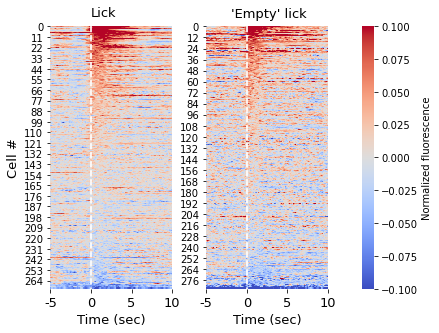

In [15]:
f, ax = plt.subplots(figsize=(6,5),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.4,hspace=0.5, bottom=0.15, left=0.1, right=0.85)
cmax=0.1 #Maximum colormap

y1=sort_by_activity(snips_PR_cas,50,70)
y2=sort_by_activity(snips_PR_malt,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(50,-10, "Lick", size=13)
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(30,-10, "'Empty' lick", size=13)
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)", size=13)
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0, size=13)

ax[0].set_ylabel("Cell #", size=13)
# ax[0].set_yticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


# f.savefig("..//output//heatmap_empty_PR_Cas.png")

In [16]:
from operator import itemgetter

def sort_by_activity(arrays, start_index, end_index):
    subset_mean_sorted = sorted(((np.mean(arr[start_index:end_index]), arr) for arr in arrays), key=itemgetter(0), reverse=True)
    sorted_arrays = [arr for _, arr in subset_mean_sorted]
    return sorted_arrays

In [17]:
#sorting by activity - PR cas activated
PR_act_cas=sort_by_activity(act_PR_cas,50,70)
PR_in_cas=sort_by_activity(in_PR_cas,50,70)
PR_cas_empty=sort_by_activity(empty_PR_cas,50,70)


NR_act_cas=sort_by_activity(act_NR_cas,50,70)
NR_in_cas=sort_by_activity(in_NR_cas,50,70)




PR_act_malt=sort_by_activity(act_PR_malt,50,70)
PR_in_malt=sort_by_activity(in_PR_malt,50,70)


NR_act_malt=sort_by_activity(act_NR_malt,50,70)
NR_in_malt=sort_by_activity(in_NR_malt,50,70)


## Heatmaps all cells NR and PR

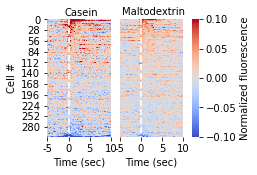

In [18]:
f, ax = plt.subplots(figsize=(3.5,2.4),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.2,hspace=0.7, bottom=0.2, left=0.2, right=0.80)
cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_NR_cas,50,70)

y2 = sort_by_activity(snips_NR_malt,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(40,-10, "Casein")
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(5,-10, "Maltodextrin")
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

# ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)")
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0)

ax[0].set_ylabel("Cell #")
ax[1].set_yticks([])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_cas-malt_NR.png")

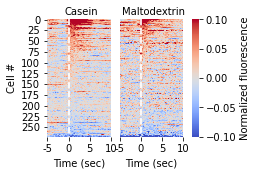

In [19]:
f, ax = plt.subplots(figsize=(3.5,2.4),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.2,hspace=0.7, bottom=0.2, left=0.2, right=0.80)
cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_PR_cas,50,70)

y2 = sort_by_activity(snips_PR_malt,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(40,-10, "Casein")
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(5,-10, "Maltodextrin")
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

# ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)")
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0)

ax[0].set_ylabel("Cell #")
ax[1].set_yticks([])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_cas-malt_PR.png")

## Signal fig NR and PR 

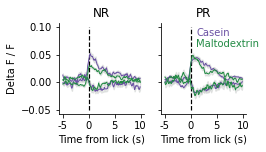

In [20]:
f, ax = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


# snips_NR_carb=[]
# act_NR_carb=[]
# in_NR_carb=[]

tp.shadedError(ax[0], act_NR_cas, linecolor="#6a51a3")
tp.shadedError(ax[0], in_NR_cas, linecolor="#6a51a3")

tp.shadedError(ax[0], act_NR_malt, linecolor="#238b45")
tp.shadedError(ax[0], in_NR_malt, linecolor="#238b45")


tp.shadedError(ax[1], act_PR_cas, linecolor="#6a51a3")
tp.shadedError(ax[1], in_PR_cas, linecolor="#6a51a3")


tp.shadedError(ax[1], act_PR_malt, linecolor="#238b45")
tp.shadedError(ax[1], in_PR_malt, linecolor="#238b45")




ax[1].text(60, 0.085, "Casein",color='#6a51a3')
ax[1].text(60, 0.065, "Maltodextrin", color="#238b45")


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)")


ax[0].set_ylabel("Delta F / F")
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)


ax[0].set_title('NR')
ax[1].set_title('PR')


f.savefig("..//output//Singal_Cas-malt1.png")

Text(19.450000000000003, 0.5, 'Inhibited \n cell#')

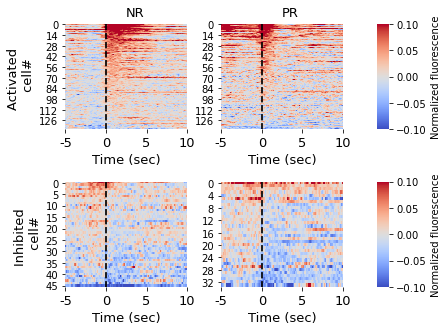

In [21]:
f, ax = plt.subplots(figsize=(6,5),ncols=3,nrows=2 ,gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.4,hspace=0.5, bottom=0.15, left=0.1, right=0.85)
cmax=0.1 #Maximum colormap

y1 = PR_act_malt
y2= NR_act_malt
y3 = PR_in_malt
y4 = NR_in_cas

sns.heatmap(PR_act_cas, ax = ax[0][0],
            cbar_ax=ax[0][2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(PR_cas_empty, ax = ax[0][1],
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            )

sns.heatmap(y4, ax = ax[1][0], 
            cbar_ax=ax[1][2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'}
           )

sns.heatmap(y3, ax = ax[1][1],
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            )

ax[0][0].text(75,-10, "NR", size=13)

ax[0][1].text(75,-10, "PR", size=13)

for axis in [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)", size=13)
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0, size=13)
    axis.vlines([50],0,150, color='black', linestyle='--', lw=1.7)

ax[0][0].set_ylabel("Activated \n cell#", size=13)
ax[1][0].set_ylabel("Inhibited \n cell#", size=13)


# f.savefig("..//output//heatmap_allcells_empty.png")

## Pie Charts

In [98]:
cols = ["data", "cas", "malt"]
df_resp_PR = pd.DataFrame(columns=cols)
df_resp_PR['cas']=len(act_PR_cas),len(in_PR_cas),len(snips_PR_cas)-(len(act_PR_cas)+len(in_PR_cas))
df_resp_PR['malt']=len(act_PR_malt),len(in_PR_malt),len(snips_PR_malt)-(len(act_PR_malt)+len(in_PR_malt))

df_resp_PR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_PR['cas_pct'] = df_resp_PR['cas'] / df_resp_PR['cas'].sum() * 100
df_resp_PR['malt_pct'] = df_resp_PR['malt'] / df_resp_PR['malt'].sum() * 100

# # Transpose the DataFrame
df_resp_PR.set_index('data', inplace=True)
df_resp_PR = df_resp_PR.T


df_resp_PR

data,lick_activated,lick_inhibited,non-responsive
cas,138.000000,48.000000,87.000000
malt,99.000000,34.000000,153.000000
cas_pct,50.549451,17.582418,31.868132
malt_pct,34.615385,11.888112,53.496503


In [97]:
cols = ["data", "cas", 'malt']
df_resp_NR = pd.DataFrame(columns=cols)
df_resp_NR['cas']=len(act_NR_cas),len(in_NR_cas),len(snips_NR_cas)-(len(act_NR_cas)+len(in_NR_cas))
df_resp_NR['malt']=len(act_NR_malt),len(in_NR_malt),len(snips_NR_malt)-(len(act_NR_malt)+len(in_NR_malt))

df_resp_NR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_NR['cas_pct'] = df_resp_NR['cas'] / df_resp_NR['cas'].sum() * 100
df_resp_NR['malt_pct'] = df_resp_NR['malt'] / df_resp_NR['malt'].sum() * 100

# # Transpose the DataFrame
df_resp_NR.set_index('data', inplace=True)
df_resp_NR = df_resp_NR.T

df_resp_NR

data,lick_activated,lick_inhibited,non-responsive
cas,84.00000,46.000000,176.000000
malt,106.00000,41.000000,134.000000
cas_pct,27.45098,15.032680,57.516340
malt_pct,37.72242,14.590747,47.686833


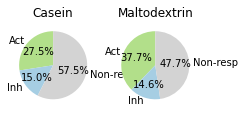

In [93]:
pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

f, [ax1, ax2] = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


ax1.pie(df_resp_NR.cas[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax2.pie(df_resp_NR.malt[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax1.set_title("Casein" )
ax2.set_title("Maltodextrin")

f.savefig("..//output//Pie_cas-malt_NR.png")




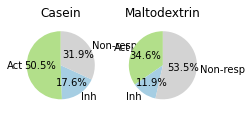

In [95]:
pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

f, [ax1, ax2] = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


ax1.pie(df_resp_PR.cas[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax2.pie(df_resp_PR.malt[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax1.set_title("Casein" )
ax2.set_title("Maltodextrin")

f.savefig("..//output//Pie_cas-malt_PR.png")

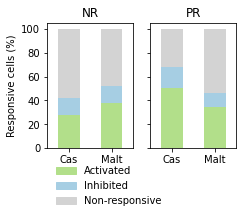

In [100]:
f, ax = plt.subplots(figsize=(3.5,3),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.3, left=0.2, right=0.95)
colors=['#b2df8a','#a6cee3','lightgrey']

df_resp_NR[2:4].plot(kind='bar', stacked=True, ax=ax[0], color=colors)

df_resp_PR[2:4].plot(kind='bar', stacked=True, ax=ax[1], color=colors)

for axis in ax:
    for p in axis.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
#         axis.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='white')
        axis.set_xticklabels(['Cas', 'Malt'], rotation=0)
    
ax[1].set_title('PR')
ax[0].set_title('NR')
ax[0].set_yticks([0,20,40,60,80,100])
ax[0].set_yticklabels([0,20,40,60,80,100])
ax[0].set_ylabel("Responsive cells (%)")

# ax[1].set_yticklabels([])
# ax[1].get_legend().remove()
ax[1].get_legend().remove()

colors = {'Activated':'#b2df8a', 'Inhibited':'#a6cee3' , 'Non-responsive': 'Lightgrey'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0.2,0.2, color=colors[label]) for label in labels]
ax[0].legend(handles, labels, frameon=False,loc='center left', bbox_to_anchor=(0, -0.3))





f.savefig("..//output//Stack_Cas-malt1.png")

In [103]:
# cols = ["data", "Cas", 'Malt']
# df_resp_PR = pd.DataFrame(columns=cols)
# df_resp_PR['Cas']=len(PR_act_cas),len(PR_in_cas),len(snips_PR_cas)-(len(PR_act_cas)+len(PR_in_cas))
# df_resp_PR['Malt']=len(act_PR_malt),len(in_PR_malt),len(snips_PR_malt)-(len(act_PR_malt)+len(in_PR_malt))
# df_resp_PR['Cas_pct'] = df_resp_PR['Cas'] / df_resp_PR['Cas'].sum() * 100
# df_resp_PR['Malt_pct'] = df_resp_PR['Malt'] / df_resp_PR['Malt'].sum() * 100
# df_resp_PR['data']='lick_activated', 'lick_inhibited','non-responsive'


# # # Transpose the DataFrame
# df_resp_PR.set_index('data', inplace=True)
# df_resp_PR = df_resp_PR.T



In [102]:
# cols = ["data", "Cas", 'Malt']
# df_resp_NR = pd.DataFrame(columns=cols)
# df_resp_NR['Cas']=len(NR_act_cas),len(NR_in_cas),len(snips_NR_cas)-(len(NR_act_cas)+len(NR_in_cas))
# df_resp_NR['Malt']=len(act_NR_malt),len(in_NR_malt),len(snips_NR_malt)-(len(act_NR_malt)+len(in_NR_malt))
# df_resp_NR['Cas_pct'] = df_resp_NR['Cas'] / df_resp_NR['Cas'].sum() * 100
# df_resp_NR['Malt_pct'] = df_resp_NR['Malt'] / df_resp_NR['Malt'].sum() * 100

# df_resp_NR['data']='lick_activated', 'lick_inhibited','non-responsive'


# # # Transpose the DataFrame
# df_resp_NR.set_index('data', inplace=True)
# df_resp_NR = df_resp_NR.T



In [101]:

# f, ax = plt.subplots(figsize=(5, 4), ncols=2)
# colors=['#b2df8a','#a6cee3','lightgrey']

# df_resp_NR[2:4].plot(kind='bar', stacked=True, ax=ax[0], color=colors)

# df_resp_PR[2:4].plot(kind='bar', stacked=True, ax=ax[1], color=colors)

# for axis in ax:
#     for p in axis.patches:
#         width, height = p.get_width(), p.get_height()
#         x, y = p.get_xy() 
#         axis.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='white')
#         axis.set_xticklabels(['Cas', 'Malt'])
    
# ax[1].set_title('PR')
# ax[0].set_title('NR')
# ax[0].set_yticks([0,20,40,60,80,100])
# ax[0].set_yticklabels([0,20,40,60,80,100])
# ax[1].set_yticklabels([])


# f.savefig("..//output//Stack.png")

# NRPR and PRNR

In [57]:
from itertools import chain

snips_PRNR_cas=[]
act_PRNR_cas=[]
in_PRNR_cas=[]
empty_PRNR_cas=[]

snips_PRNR_malt=[]
act_PRNR_malt=[]
in_PRNR_malt=[]
empty_PRNR_malt=[]


snips_NRPR_cas=[]
act_NRPR_cas=[]
in_NRPR_cas=[]
empty_NRPR_cas=[]

snips_NRPR_malt=[]
act_NRPR_malt=[]
in_NRPR_malt=[]
empty_NRPR_malt=[]

animal=[]
for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PRNR' and d['session']=='C5':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        empty_licks=d['empty_lick_snips_all'][np.where(d['lick_responsive']==1)]
        

        for cell in snips:
            snips_PRNR_cas.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PRNR_cas.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PRNR_cas.append(np.mean(cell, axis=0))
        for cell in empty_licks:
            empty_PRNR_cas.append(np.mean(cell, axis=0))
            
            
    elif d['diet']=='PRNR' and d['session']=='M5':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        empty_licks=d['empty_lick_snips_all']
        animal.append(d['animal'])

        for cell in snips:
            snips_PRNR_malt.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PRNR_malt.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PRNR_malt.append(np.mean(cell, axis=0))
        for cell in empty_licks:
            empty_PRNR_malt.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NRPR' and d['session']=='C5':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]

        for cell in snips:
            snips_NRPR_cas.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NRPR_cas.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NRPR_cas.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NRPR' and d['session']=='M5':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]

        for cell in snips:
            snips_NRPR_malt.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NRPR_malt.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NRPR_malt.append(np.mean(cell, axis=0))

            
# #Filtering out nan values. need to figure out why there's one cell with nan values... 
# empty_PR_malt_f=[]        
# for cell in empty_PR_malt: 
#     if not np.isnan(cell).any(): 
#         empty_PR_malt_f.append(cell)
        
        



## heatmaps

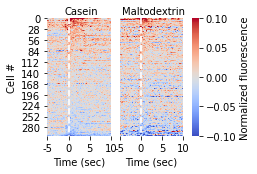

In [58]:
f, ax = plt.subplots(figsize=(3.5,2.4),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.2,hspace=0.7, bottom=0.2, left=0.2, right=0.80)
cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_NRPR_cas,50,70)

y2 = sort_by_activity(snips_NRPR_malt,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(40,-10, "Casein")
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(5,-10, "Maltodextrin")
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

# ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)")
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0)

ax[0].set_ylabel("Cell #")
ax[1].set_yticks([])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_cas-malt_NRPR.png")

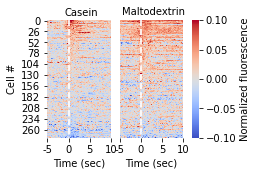

In [59]:
f, ax = plt.subplots(figsize=(3.5,2.4),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.2,hspace=0.7, bottom=0.2, left=0.2, right=0.80)
cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_PRNR_cas,50,70)

y2 = sort_by_activity(snips_PRNR_malt,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(40,-10, "Casein")
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(5,-10, "Maltodextrin")
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

# ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)")
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0)

ax[0].set_ylabel("Cell #")
ax[1].set_yticks([])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_cas-malt_PRNR.png")

Text(19.450000000000003, 0.5, 'Inhibited \n cell#')

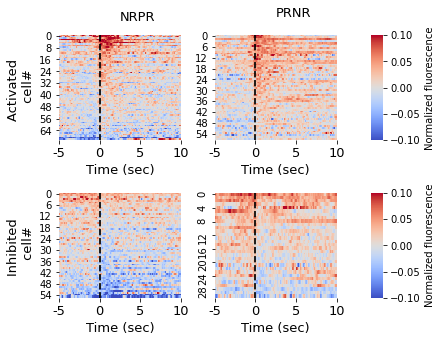

In [60]:
f, ax = plt.subplots(figsize=(6,5),ncols=3,nrows=2 ,gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.4,hspace=0.5, bottom=0.15, left=0.1, right=0.85)
cmax=0.1 #Maximum colormap

y1 = sort_by_activity(act_NRPR_malt,50,70)
y2= sort_by_activity(act_PRNR_malt,50,70)
y3 = sort_by_activity(in_NRPR_malt,50,70)
y4 = sort_by_activity(in_PRNR_malt,50,70)

sns.heatmap(y1, ax = ax[0][0],
            cbar_ax=ax[0][2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[0][1],
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            )

sns.heatmap(y3, ax = ax[1][0], 
            cbar_ax=ax[1][2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'}
           )

sns.heatmap(y4, ax = ax[1][1],
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            )

ax[0][0].text(75,-10, "NRPR", size=13)

ax[0][1].text(75,-10, "PRNR", size=13)

for axis in [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)", size=13)
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0, size=13)
    axis.vlines([50],0,150, color='black', linestyle='--', lw=1.7)

ax[0][0].set_ylabel("Activated \n cell#", size=13)
ax[1][0].set_ylabel("Inhibited \n cell#", size=13)




## Signal

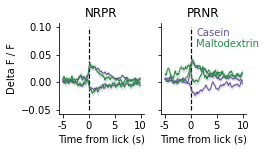

In [61]:
f, ax = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)



tp.shadedError(ax[0], act_NRPR_cas, linecolor="#6a51a3")
tp.shadedError(ax[0], in_NRPR_cas, linecolor="#6a51a3")

tp.shadedError(ax[0], act_NRPR_malt, linecolor="#238b45")
tp.shadedError(ax[0], in_NRPR_malt, linecolor="#238b45")


tp.shadedError(ax[1], act_PRNR_cas, linecolor="#6a51a3")
tp.shadedError(ax[1], in_PRNR_cas, linecolor="#6a51a3")


tp.shadedError(ax[1], act_PRNR_malt, linecolor="#238b45")
tp.shadedError(ax[1], in_PRNR_malt, linecolor="#238b45")




ax[1].text(60, 0.085, "Casein",color='#6a51a3')
ax[1].text(60, 0.065, "Maltodextrin", color="#238b45")


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)")


ax[0].set_ylabel("Delta F / F")
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)


ax[0].set_title('NRPR')
ax[1].set_title('PRNR')


f.savefig("..//output//Singal_Cas-malt2.png")

## Pie Chars

In [106]:
cols = ["data", "cas", 'malt']
df_resp_PRNR = pd.DataFrame(columns=cols)
df_resp_PRNR['cas']=len(act_PRNR_cas),len(in_PRNR_cas),len(snips_PRNR_cas)-(len(act_PRNR_cas)+len(in_PRNR_cas))
df_resp_PRNR['malt']=len(act_PRNR_malt),len(in_PRNR_malt),len(snips_PRNR_malt)-(len(act_PRNR_malt)+len(in_PRNR_malt))

df_resp_PRNR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_PRNR['cas_pct_2'] = df_resp_PRNR['cas'] / df_resp_PRNR['cas'].sum() * 100
df_resp_PRNR['malt_pct_2'] = df_resp_PRNR['malt'] / df_resp_PRNR['malt'].sum() * 100

# # Transpose the DataFrame
df_resp_PRNR.set_index('data', inplace=True)
df_resp_PRNR = df_resp_PRNR.T

df_resp_PRNR

data,lick_activated,lick_inhibited,non-responsive
cas,100.000000,48.000000,131.000000
malt,58.000000,31.000000,137.000000
cas_pct_2,35.842294,17.204301,46.953405
malt_pct_2,25.663717,13.716814,60.619469


Figure for cells activated by casein and maltodextrin

In [107]:
NR_cas=[]
NRPR_cas=[]
for row in df_NR_cas.iterrows():
    NR_cas.append(row[1].NR)
    NRPR_cas.append(row[1].NRPR)

NR_malt=[]
NRPR_malt=[]
for row in df_NR_malt.iterrows():
    NR_malt.append(row[1].NR)
    NRPR_malt.append(row[1].NRPR)
    
    
PR_cas=[]
PRNR_cas=[]
for row in df_PR_cas.iterrows():
    PR_cas.append(row[1].PR)
    PRNR_cas.append(row[1].PRNR)

PR_malt=[]
PRNR_malt=[]
for row in df_PR_malt.iterrows():
    PR_malt.append(row[1].PR)
    PRNR_malt.append(row[1].PRNR)

    

colors_1=['#af8dc3', '#762a83','#762a83','#af8dc3']
colors_M=['#7fbf7b', '#1b7837','#1b7837','#7fbf7b']


f,ax=plt.subplots(figsize=(4.5,5), ncols=1, nrows=2, sharey='row')
f.subplots_adjust(wspace=0.15,hspace=0.5, bottom=0.05, left=0.25)

tp.barscatter([[NR_cas,NRPR_cas],[PR_cas,PRNR_cas]], 
              paired= True,
              barfacecolor=colors_1,
              barfacecolor_option="individual",
              barlabels=['NR', 'NRPR', 'PR', 'PRNR'],
              fontsize = 13,
              scattersize=110,
              scatteralpha=0.9,
              spaced=True,
              linewidth=1.5,
              ax=ax[0],
              show_legend=False)

tp.barscatter([[NR_malt,NRPR_malt],[PR_malt,PRNR_malt]], 
              paired= True,
              barfacecolor=colors_M,
              barfacecolor_option="individual",
              barlabels=['NR', 'NRPR', 'PR', 'PRNR'],
              fontsize = 13,
              scattersize=110,
              scatteralpha=0.9,
              spaced=True,
              linewidth=1.5,
              ax=ax[1],
              show_legend=False)

ax[0].set_ylabel('Lick responsive cells (%)',fontsize = 13)
ax[0].set_yticks([0,20,40,60,80])
ax[0].set_yticklabels([0,20,40,60,80], fontsize = 13)

ax[1].set_ylabel('Lick responsive cells (%)',fontsize = 13)
ax[1].set_yticks([0,20,40,60,80])
ax[1].set_yticklabels([0,20,40,60,80], fontsize = 13)


ax[0].set_title('Casein', fontsize =15)
ax[1].set_title('Maltodextrin', fontsize =15)

f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\%_lick_activated_cells.png')

NameError: name 'df_NR_cas' is not defined

Dataframes for each group (NR and PR) Preferense

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Making dataframe for NR-NRPR group
df_NR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref1")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR)
 .drop(columns=["PR"])
 .dropna()
)

df_NRPR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref2")
#  .fillna(0)
 .assign(NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PRNR"])
 .dropna()
)

# Making dataframe for PR-PRNR group
df_PR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref1")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR)
 .drop(columns=["NR"])
 .dropna()
)


df_PRNR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref2")
#  .fillna(0)
 .assign(PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NRPR"])
 .dropna()
)
# print(df_NR)
# print(df_PR)


pref_NR=[]
for row in df_NR.iterrows():
    pref_NR.append(row[1].NR)
    
pref_PR=[]
for row in df_PR.iterrows():
    pref_PR.append(row[1].PR)

    
pref_NRPR=[]
for row in df_NRPR.iterrows():
    pref_NRPR.append(row[1].NRPR)
    
pref_PRNR=[]
for row in df_PRNR.iterrows():
    pref_PRNR.append(row[1].PRNR)
    

Figure for proportion of cells activated by casin - malodextrin

NameError: name 'pref_NR' is not defined

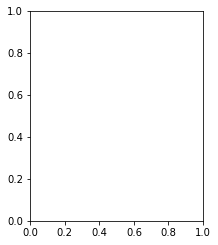

In [70]:
f, ax = plt.subplots(figsize=(4,4))
f.subplots_adjust(wspace=0.15,hspace=0.35, bottom=0.15, left=0.3)


x1 = [1,2]
x2=[3,4]

for row in zip(pref_NR,pref_NRPR):
    y=row
    ax.plot(x1, y, color="grey")
    ax.scatter(x1, y, s=150, color=["#af8dc3", "#762a83"], zorder=20, alpha=0.8)

for row in zip(pref_PR,pref_PRNR):
    y=row
    ax.plot(x2, y, color="grey")
    ax.scatter(x2, y, s=150, color=["#762a83", "#af8dc3"], zorder=20, alpha=0.8)

  
    
ax.bar(x1, [np.mean(pref_NR),np.mean(pref_NRPR)], width=0.7, zorder=-1, color="lightgrey")
ax.bar(x2, [np.mean(pref_PR),np.mean(pref_PRNR)], width=0.7, zorder=-1, color="lightgrey")
    
ax.set_ylabel("Proportion of cells responsive \n to casein vs maltodextrin", size=13)
ax.set_yticks([-40,-20,0,20,40])
ax.set_yticklabels(['-40','-20','0','20','40'], size=13)

ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["NR", 'NRPR','PR','PRNR'], size=13)
ax.set_xlim([0.4,4.6])

ax.axhline(0, color="k", linestyle="--", zorder=-1,lw=1.2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\pref_casein_cells.png')

## Proportion of cells responsive to Cas/malt

In [ ]:
df_diet1 = (df_pref
#  .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref")
#  .fillna(0)
 .assign(PR=lambda df_: df_.PR,
         PRNR=lambda df_:df_.PRNR,
         NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR,
)
 .drop(columns=["NRPR", "PRNR"])
)



In [ ]:
my_colors = {'NR': '#525252', 'PR': '#2171b5'}

'','','',''
f, ax = plt.subplots(figsize=(6,3),
                     gridspec_kw={"left": 0.25, "bottom": 0.2})

sns.boxplot(data=df_diet1,orient="h", ax=ax, palette=my_colors)


ax.set_ylabel("")
ax.set_yticklabels(["NR", "PR"])
ax.set_xticks([-30, 0, 20, 30])
ax.set_xlabel("Lick-activated cells (casein - maltodextrin)")

ax.axvline(0, color="k", linestyle="--", zorder=-1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# f.savefig("..//output//grouped_casmalt_diff.png")

In [ ]:
df_boxplot = (df_pref
#  .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref")
#  .fillna(0)
 .assign(PR=lambda df_: df_.PR,
         PRNR=lambda df_:df_.PRNR,
         NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR,
)
#  .drop(columns=["NRPR", "PRNR"])
)





In [ ]:
my_colors = {'NR': '#525252', 'NRPR': '#969696', 'PR': '#2171b5','PRNR':'#6baed6'}

'','','',''
f, ax = plt.subplots(figsize=(4,6),
                     gridspec_kw={"left": 0.25, "bottom": 0.2})


sns.boxplot(data=df_boxplot,orient="v", ax=ax, palette=my_colors)


ax.set_xlabel("")
ax.set_xticklabels(["NR",'NRPR', "PR", 'PRNR'],size=13)
ax.set_yticks([-30, -15,0, 15, 30])
ax.set_yticklabels(['-30','-15', '0', '15', '30'],size=13)
ax.set_ylabel("Lick-activated cells (casein - maltodextrin)",size=13)

ax.axhline(0, color="k", linestyle="--", zorder=-1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# f.savefig("..//output//grouped_casmalt_diff.png")

In [ ]:
sns.boxplot?